<a href="https://colab.research.google.com/github/chjayarajesh/Brain-Stroke-detection-and-Segmentation/blob/main/Final_year_project(Stroke).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Stroke classification and segmentation**

Using Kaggle API to import dataset

In [1]:
!pip install -q kaggle timm

# Upload kaggle.json from your Kaggle account (Account → API → Create New Token)
from google.colab import files
files.upload()

# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


Downloading Dataset

In [2]:
# Download the Brain Stroke CT Dataset
!kaggle datasets download -d ozguraslank/brain-stroke-ct-dataset -p /content/dataset

# Unzip the dataset
!unzip -q /content/dataset/brain-stroke-ct-dataset.zip -d /content/dataset


Dataset URL: https://www.kaggle.com/datasets/ozguraslank/brain-stroke-ct-dataset
License(s): other
 98% 1.38G/1.41G [00:12<00:00, 40.7MB/s]
100% 1.41G/1.41G [00:12<00:00, 125MB/s] 


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split
import cv2  # Added import for OpenCV

# Step 1: Segregate images and overlays into train, val, test
def segregate_dataset(base_dir, classes, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    for cls in classes:
        png_dir = os.path.join(base_dir, cls, 'PNG')
        overlay_dir = os.path.join(base_dir, cls, 'OVERLAY')
        if not os.path.exists(png_dir):
            print(f"PNG folder not found for {cls}. Skipping...")
            continue

        # Get list of PNG images
        images = [os.path.join(png_dir, f) for f in os.listdir(png_dir) if f.lower().endswith('.png')]
        if len(images) == 0:
            print(f"No PNG images found for {cls}. Skipping...")
            continue

        # Split into train/val/test
        train_images, test_images = train_test_split(images, test_size=val_ratio + test_ratio, random_state=42)
        val_images, test_images = train_test_split(test_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Create directories for PNG and OVERLAY
        for split, split_images in [('train', train_images), ('val', val_images), ('test', test_images)]:
            split_png_dir = os.path.join(base_dir, split, 'PNG', cls)
            split_overlay_dir = os.path.join(base_dir, split, 'OVERLAY', cls)
            os.makedirs(split_png_dir, exist_ok=True)
            os.makedirs(split_overlay_dir, exist_ok=True)

            # Copy PNG images
            for img in split_images:
                filename = os.path.basename(img)
                shutil.copy(img, os.path.join(split_png_dir, filename))

            # Copy corresponding OVERLAY images or create zero mask for Normal
            for img in split_images:
                filename = os.path.basename(img)
                overlay_path = os.path.join(overlay_dir, filename)
                if os.path.exists(overlay_path):
                    shutil.copy(overlay_path, os.path.join(split_overlay_dir, filename))
                elif cls == 'Normal' and not os.path.exists(overlay_dir):
                    # Create a zero mask for Normal if no overlay exists
                    zero_mask = np.zeros((256, 256), dtype=np.uint8)  # Adjust size if needed
                    cv2.imwrite(os.path.join(split_overlay_dir, filename), zero_mask)
                    print(f"Created zero mask for {filename} in {cls}")
                else:
                    print(f"Overlay not found for {filename}, skipping copy.")

        print(f"{cls}: Train {len(train_images)}, Val {len(val_images)}, Test {len(test_images)}")

# Base directory (adjust to your Colab path)
base_dir = '/content/dataset/Brain_Stroke_CT_Dataset'  # Update to your actual path
classes = ['Bleeding', 'Ischemia', 'Normal']  # Adjust based on your dataset

# Run segregation
segregate_dataset(base_dir, classes)

Bleeding: Train 765, Val 164, Test 164
Ischemia: Train 791, Val 169, Test 170
Created zero mask for 16369.png in Normal
Created zero mask for 12043.png in Normal
Created zero mask for 14518.png in Normal
Created zero mask for 14470.png in Normal
Created zero mask for 11108.png in Normal
Created zero mask for 13916.png in Normal
Created zero mask for 12987.png in Normal
Created zero mask for 14148.png in Normal
Created zero mask for 16275.png in Normal
Created zero mask for 13031.png in Normal
Created zero mask for 13086.png in Normal
Created zero mask for 13208.png in Normal
Created zero mask for 13131.png in Normal
Created zero mask for 13008.png in Normal
Created zero mask for 15493.png in Normal
Created zero mask for 10556.png in Normal
Created zero mask for 10256.png in Normal
Created zero mask for 12513.png in Normal
Created zero mask for 16019.png in Normal
Created zero mask for 15238.png in Normal
Created zero mask for 15167.png in Normal
Created zero mask for 15052.png in Norma

# **1. Classification Model training**

---


Dataset Segregating into Train,Test and validate

---


Preproccesing and augmentation of dataset

---

ConvNext model -(Convolutional Next)


Number of training samples: 4654
Number of validation samples: 997
Number of test samples: 999
Classes: ['Bleeding', 'Ischemia', 'Normal']
Using device: cuda


model.safetensors:  38%|###8      | 136M/354M [00:00<?, ?B/s]

Starting epoch 1/10


Epoch 1/10: 100%|██████████| 146/146 [03:36<00:00,  1.48s/it, loss=0.4306]


Epoch [1/10], Loss: 0.4764, Val Loss: 0.2354, Val Acc: 0.9147, Precision: 0.9144, Recall: 0.9147, F1: 0.9115
Starting epoch 2/10


Epoch 2/10: 100%|██████████| 146/146 [03:30<00:00,  1.44s/it, loss=0.2097]


Epoch [2/10], Loss: 0.1933, Val Loss: 0.1532, Val Acc: 0.9428, Precision: 0.9433, Recall: 0.9428, F1: 0.9416
Starting epoch 3/10


Epoch 3/10: 100%|██████████| 146/146 [03:29<00:00,  1.44s/it, loss=0.0335]


Epoch [3/10], Loss: 0.1056, Val Loss: 0.1557, Val Acc: 0.9418, Precision: 0.9408, Recall: 0.9418, F1: 0.9401
Starting epoch 4/10


Epoch 4/10: 100%|██████████| 146/146 [03:29<00:00,  1.44s/it, loss=0.0252]


Epoch [4/10], Loss: 0.0705, Val Loss: 0.1702, Val Acc: 0.9478, Precision: 0.9496, Recall: 0.9478, F1: 0.9460
Starting epoch 5/10


Epoch 5/10: 100%|██████████| 146/146 [03:29<00:00,  1.44s/it, loss=0.0125]


Epoch [5/10], Loss: 0.0536, Val Loss: 0.1241, Val Acc: 0.9539, Precision: 0.9533, Recall: 0.9539, F1: 0.9534
Starting epoch 6/10


Epoch 6/10: 100%|██████████| 146/146 [03:29<00:00,  1.44s/it, loss=0.0002]


Epoch [6/10], Loss: 0.0338, Val Loss: 0.0997, Val Acc: 0.9599, Precision: 0.9606, Recall: 0.9599, F1: 0.9601
Starting epoch 7/10


Epoch 7/10: 100%|██████████| 146/146 [03:30<00:00,  1.44s/it, loss=0.0063]


Epoch [7/10], Loss: 0.0235, Val Loss: 0.2097, Val Acc: 0.9358, Precision: 0.9431, Recall: 0.9358, F1: 0.9372
Starting epoch 8/10


Epoch 8/10: 100%|██████████| 146/146 [03:29<00:00,  1.43s/it, loss=0.0216]


Epoch [8/10], Loss: 0.0224, Val Loss: 0.0818, Val Acc: 0.9729, Precision: 0.9732, Recall: 0.9729, F1: 0.9729
Starting epoch 9/10


Epoch 9/10: 100%|██████████| 146/146 [03:29<00:00,  1.43s/it, loss=0.0008]


Epoch [9/10], Loss: 0.0118, Val Loss: 0.0806, Val Acc: 0.9779, Precision: 0.9781, Recall: 0.9779, F1: 0.9780
Starting epoch 10/10


Epoch 10/10: 100%|██████████| 146/146 [03:29<00:00,  1.44s/it, loss=0.2248]


Epoch [10/10], Loss: 0.0265, Val Loss: 0.1064, Val Acc: 0.9639, Precision: 0.9636, Recall: 0.9639, F1: 0.9634


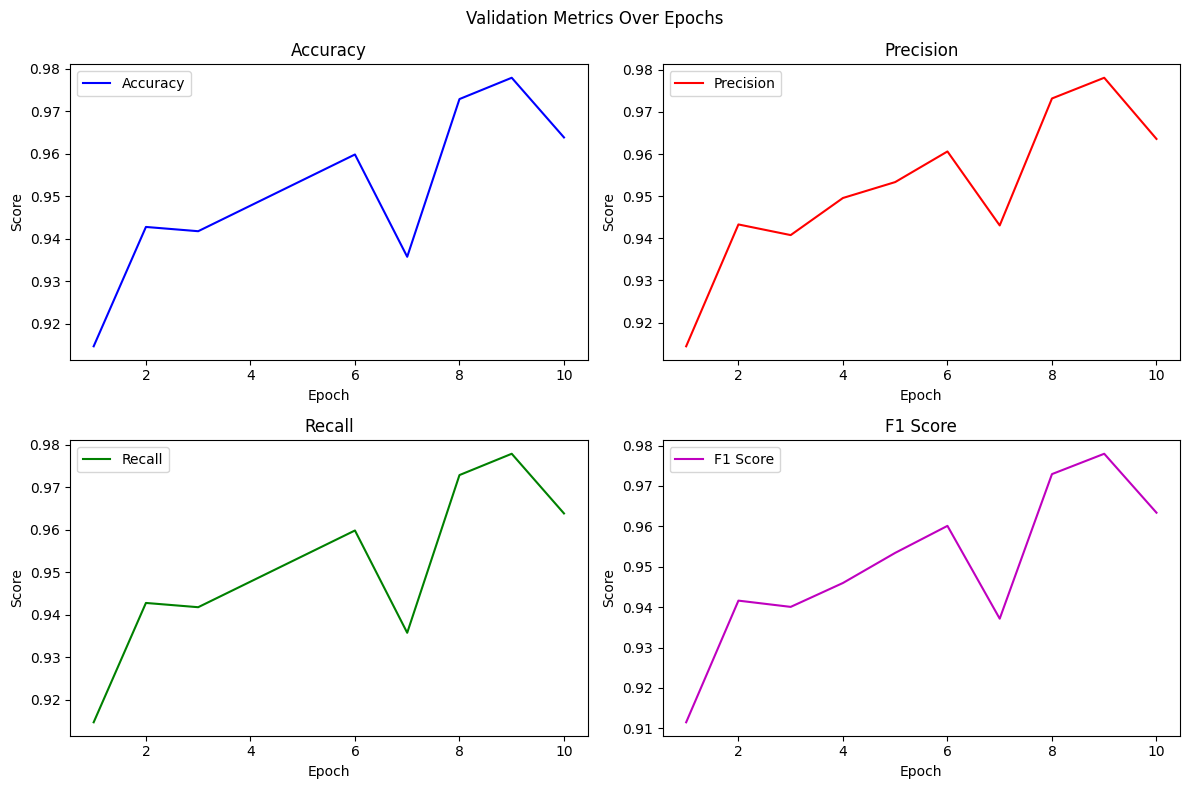

Accuracy: 0.9640
Precision: 0.9639
Recall: 0.9640
F1 Score: 0.9639


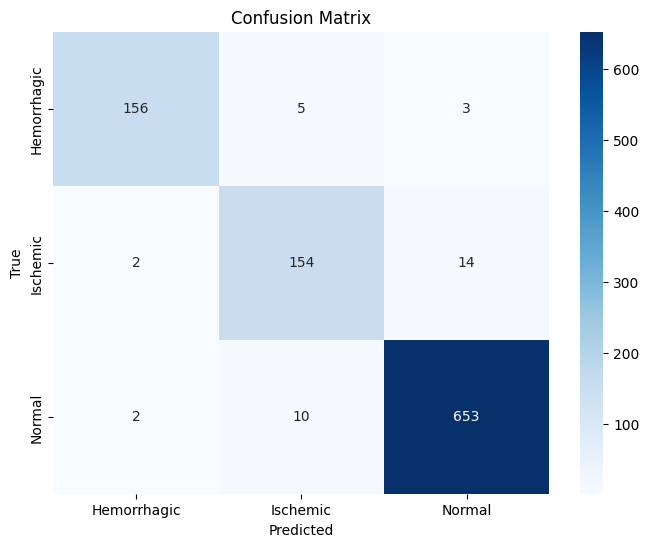

In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm  # For progress bar

base_dir = '/content/dataset/Brain_Stroke_CT_Dataset'  # Update to your actual path in Colab
# Step 2: Preprocessing and Training
# Custom transform to replicate grayscale to 3 channels
class GrayscaleToRGB:
    def __call__(self, image):
        if image.shape[0] == 1:
            return torch.cat([image] * 3, dim=0)
        return image

# Custom Dataset with 3-channel replication
class CTDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.class_names = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.class_names)}

        for cls_name in self.class_names:
            cls_dir = os.path.join(data_dir, cls_name)
            if os.path.isdir(cls_dir):
                for img_name in os.listdir(cls_dir):
                    img_path = os.path.join(cls_dir, img_name)
                    if os.path.isfile(img_path):
                        self.images.append(img_path)
                        self.labels.append(self.class_to_idx[cls_name])
        if not self.images:
            raise ValueError(f"No images found in {data_dir}. Check your dataset path and ensure it contains image subfolders.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        try:
            image = Image.open(img_path).convert('L')  # Load as grayscale
            if self.transform:
                image = self.transform(image)  # Apply full transform pipeline
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return torch.zeros(3, 224, 224), label  # Return 3-channel placeholder

# Load datasets (after segregation, use the train/val/test directories)
train_dir = os.path.join(base_dir, 'train/PNG')
val_dir = os.path.join(base_dir, 'val/PNG')
test_dir = os.path.join(base_dir, 'test/PNG')

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    GrayscaleToRGB(),  # Replicate to 3 channels after ToTensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 3-channel normalization
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    GrayscaleToRGB(),  # Replicate to 3 channels after ToTensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = CTDataset(train_dir, transform=train_transform)
val_dataset = CTDataset(val_dir, transform=val_test_transform)
test_dataset = CTDataset(test_dir, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.class_names}")

# Set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load pre-trained ConvNeXt-Base model
model = timm.create_model('convnext_base', pretrained=True)
model.reset_classifier(num_classes=3)  # 3 classes: hemorrhagic, ischemic, normal
model = model.to(device)


# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_acc = 0.0
    val_accuracies = []
    val_precisions = []
    val_recalls = []
    val_f1_scores = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        print(f"Starting epoch {epoch + 1}/{num_epochs}")
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}") as pbar:
            for i, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                pbar.set_postfix({'loss': f'{loss.item():.4f}'})
                pbar.update(1)

        # Validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_val_loss = val_loss / len(val_loader)
        epoch_acc = accuracy_score(all_labels, all_preds)
        epoch_precision = precision_score(all_labels, all_preds, average='weighted')
        epoch_recall = recall_score(all_labels, all_preds, average='weighted')
        epoch_f1 = f1_score(all_labels, all_preds, average='weighted')
        val_accuracies.append(epoch_acc)
        val_precisions.append(epoch_precision)
        val_recalls.append(epoch_recall)
        val_f1_scores.append(epoch_f1)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_acc:.4f}, Precision: {epoch_precision:.4f}, Recall: {epoch_recall:.4f}, F1: {epoch_f1:.4f}')

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_model_3class.pth')

    # Plot graphs for 4 parameters
    epochs = range(1, num_epochs + 1)
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle('Validation Metrics Over Epochs')

    # Accuracy graph
    axs[0, 0].plot(epochs, val_accuracies, label='Accuracy', color='b')
    axs[0, 0].set_title('Accuracy')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].legend()

    # Precision graph
    axs[0, 1].plot(epochs, val_precisions, label='Precision', color='r')
    axs[0, 1].set_title('Precision')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].legend()

    # Recall graph
    axs[1, 0].plot(epochs, val_recalls, label='Recall', color='g')
    axs[1, 0].set_title('Recall')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].legend()

    # F1 Score graph
    axs[1, 1].plot(epochs, val_f1_scores, label='F1 Score', color='m')
    axs[1, 1].set_title('F1 Score')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.savefig('validation_metrics_graphs.png')  # Save the figure
    plt.show()
    return val_accuracies, val_precisions, val_recalls, val_f1_scores

# Evaluate function
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hemorrhagic', 'Ischemic', 'Normal'], yticklabels=['Hemorrhagic', 'Ischemic', 'Normal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')  # Save the confusion matrix
    plt.show()

# Train the model and get metrics
val_accuracies, val_precisions, val_recalls, val_f1_scores = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Load best model and evaluate
model.load_state_dict(torch.load('best_model_3class.pth'))
evaluate_model(model, test_loader)

# **Segmentation Model training**

---


Dataset Segregating into Train,Test and validate

---


Preproccesing and augmentation of dataset

---

U-Net with efficientnet-b4 encoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 7.9 MB/s eta 0:00:00
Training samples: 4654
Validation samples: 997
Test samples: 999


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/77.9M [00:00<?, ?B/s]


Epoch 1/50


Training: 100%|██████████| 582/582 [02:07<00:00,  4.57it/s, Loss=0.4256]


Train Loss: 0.5333, Val Loss: 0.4882
New best model saved!

Epoch 2/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.1089]


Train Loss: 0.3411, Val Loss: 0.4032
New best model saved!

Epoch 3/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.4946]


Train Loss: 0.2480, Val Loss: 0.3915
New best model saved!

Epoch 4/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.2512]


Train Loss: 0.2242, Val Loss: 0.4148

Epoch 5/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.59it/s, Loss=0.3317]


Train Loss: 0.2100, Val Loss: 0.3953

Epoch 6/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0502]


Train Loss: 0.1965, Val Loss: 0.3821
New best model saved!

Epoch 7/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.0733]


Train Loss: 0.1836, Val Loss: 0.3891

Epoch 8/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.1382]


Train Loss: 0.1782, Val Loss: 0.3811
New best model saved!

Epoch 9/50


Training: 100%|██████████| 582/582 [02:08<00:00,  4.53it/s, Loss=0.2603]


Train Loss: 0.1692, Val Loss: 0.3787
New best model saved!

Epoch 10/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.60it/s, Loss=0.1993]


Train Loss: 0.1760, Val Loss: 0.3797

Epoch 11/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.4998]


Train Loss: 0.1843, Val Loss: 0.3825

Epoch 12/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0828]


Train Loss: 0.1702, Val Loss: 0.3798

Epoch 13/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.4428]


Train Loss: 0.1637, Val Loss: 0.3847

Epoch 14/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.0827]


Train Loss: 0.1692, Val Loss: 0.3807

Epoch 15/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.0425]


Train Loss: 0.1618, Val Loss: 0.3810

Epoch 16/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.4617]


Train Loss: 0.1522, Val Loss: 0.3827

Epoch 17/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0970]


Train Loss: 0.1541, Val Loss: 0.3762
New best model saved!

Epoch 18/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.1435]


Train Loss: 0.1439, Val Loss: 0.3764

Epoch 19/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0354]


Train Loss: 0.1511, Val Loss: 0.3780

Epoch 20/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.1864]


Train Loss: 0.1476, Val Loss: 0.3793

Epoch 21/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.2647]


Train Loss: 0.1473, Val Loss: 0.3800

Epoch 22/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.2579]


Train Loss: 0.1426, Val Loss: 0.3871

Epoch 23/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0371]


Train Loss: 0.1410, Val Loss: 0.3757
New best model saved!

Epoch 24/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.0983]


Train Loss: 0.1367, Val Loss: 0.3779

Epoch 25/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.5000]


Train Loss: 0.1442, Val Loss: 0.3752
New best model saved!

Epoch 26/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.0767]


Train Loss: 0.1360, Val Loss: 0.3746
New best model saved!

Epoch 27/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.65it/s, Loss=0.5004]


Train Loss: 0.1368, Val Loss: 0.3797

Epoch 28/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.0847]


Train Loss: 0.1282, Val Loss: 0.3760

Epoch 29/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.0395]


Train Loss: 0.1333, Val Loss: 0.3755

Epoch 30/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.1356]


Train Loss: 0.1362, Val Loss: 0.3750

Epoch 31/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.0903]


Train Loss: 0.1348, Val Loss: 0.3794

Epoch 32/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.0824]


Train Loss: 0.1286, Val Loss: 0.3767

Epoch 33/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.1525]


Train Loss: 0.1250, Val Loss: 0.3737
New best model saved!

Epoch 34/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.1015]


Train Loss: 0.1265, Val Loss: 0.3725
New best model saved!

Epoch 35/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.3092]


Train Loss: 0.1147, Val Loss: 0.3727

Epoch 36/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.5000]


Train Loss: 0.1216, Val Loss: 0.3729

Epoch 37/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.64it/s, Loss=0.0812]


Train Loss: 0.1171, Val Loss: 0.3750

Epoch 38/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0762]


Train Loss: 0.1262, Val Loss: 0.3748

Epoch 39/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.1092]


Train Loss: 0.1211, Val Loss: 0.3727

Epoch 40/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.2260]


Train Loss: 0.1171, Val Loss: 0.3728

Epoch 41/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.65it/s, Loss=0.5000]


Train Loss: 0.1243, Val Loss: 0.3730

Epoch 42/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.59it/s, Loss=0.5002]


Train Loss: 0.1209, Val Loss: 0.3737

Epoch 43/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.5000]


Train Loss: 0.1242, Val Loss: 0.3710
New best model saved!

Epoch 44/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.0621]


Train Loss: 0.1184, Val Loss: 0.3715

Epoch 45/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.59it/s, Loss=0.0546]


Train Loss: 0.1142, Val Loss: 0.3720

Epoch 46/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.63it/s, Loss=0.0264]


Train Loss: 0.1153, Val Loss: 0.3726

Epoch 47/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.0255]


Train Loss: 0.1169, Val Loss: 0.3724

Epoch 48/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.2087]


Train Loss: 0.1148, Val Loss: 0.3722

Epoch 49/50


Training: 100%|██████████| 582/582 [02:06<00:00,  4.61it/s, Loss=0.1231]


Train Loss: 0.1024, Val Loss: 0.3717

Epoch 50/50


Training: 100%|██████████| 582/582 [02:05<00:00,  4.62it/s, Loss=0.1245]


Train Loss: 0.1192, Val Loss: 0.3758


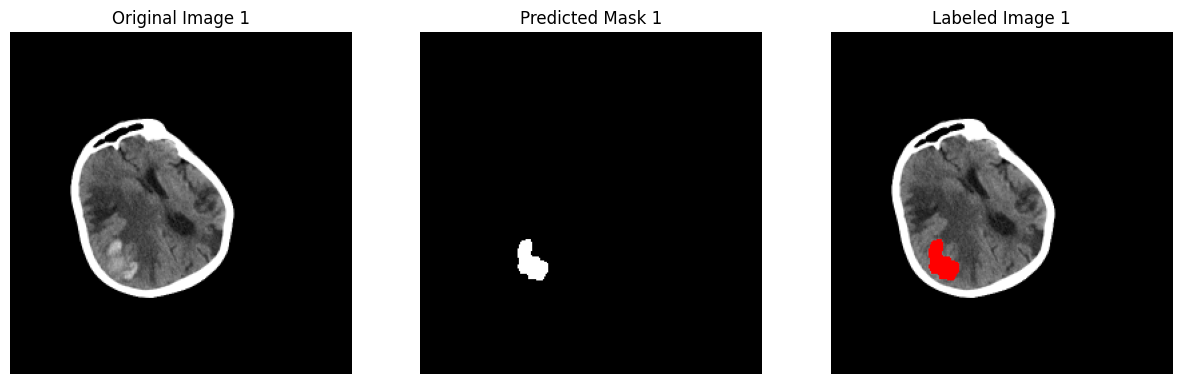

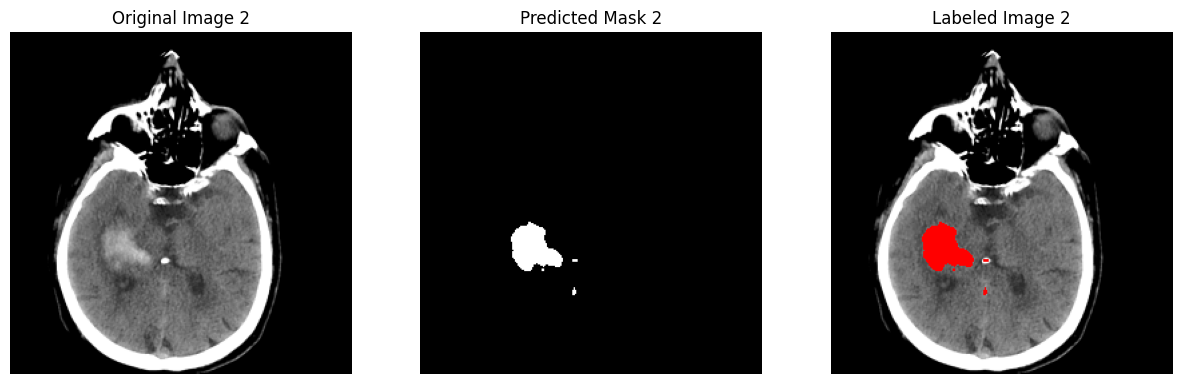

In [10]:
# Install dependencies
!pip install segmentation-models-pytorch albumentations -q

import os
import cv2
from glob import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from tqdm import tqdm
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Configuration
class Config:
    BATCH_SIZE = 8  # Adjust based on GPU memory
    IMG_HEIGHT = 256
    IMG_WIDTH = 256
    EPOCHS = 50
    LEARNING_RATE = 1e-4
    DATASET_PATH = '/content/dataset/Brain_Stroke_CT_Dataset'  # Update to your Colab path
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    NUM_WORKERS = 2

config = Config()

# Function to extract red mask from OVERLAY
def extract_red_mask_from_path(mask_path, width, height):
    if mask_path is None or not os.path.exists(mask_path):
        return np.zeros((height, width), dtype=np.float32)
    overlay = cv2.imread(mask_path)
    if overlay is None:
        return np.zeros((height, width), dtype=np.float32)
    hsv = cv2.cvtColor(overlay, cv2.COLOR_BGR2HSV)
    lower1, upper1 = np.array([0, 50, 50]), np.array([10, 255, 255])
    lower2, upper2 = np.array([170, 50, 50]), np.array([180, 255, 255])
    mask = cv2.inRange(hsv, lower1, upper1) | cv2.inRange(hsv, lower2, upper2)
    mask = (mask > 0).astype(np.float32)
    mask = cv2.resize(mask, (width, height), interpolation=cv2.INTER_NEAREST)
    return mask

# Load data from pre-split folders (train, val, test)
def load_data(base_dir, split):
    image_paths = []
    mask_paths = []
    classes = ['Bleeding', 'Ischemia', 'Normal']  # Adjust classes if different
    for cls in classes:
        png_dir = os.path.join(base_dir, split, 'PNG', cls)
        overlay_dir = os.path.join(base_dir, split, 'OVERLAY', cls)
        if not os.path.exists(png_dir):
            print(f"PNG folder not found for {cls} in {split}. Skipping...")
            continue
        png_files = glob(os.path.join(png_dir, '*.png'))
        for png in png_files:
            filename = os.path.basename(png)
            overlay = os.path.join(overlay_dir, filename)
            image_paths.append(png)
            mask_paths.append(overlay if os.path.exists(overlay) else None)  # Use None for zero mask
    return image_paths, mask_paths

train_images, train_masks = load_data(config.DATASET_PATH, 'train')
val_images, val_masks = load_data(config.DATASET_PATH, 'val')
test_images, test_masks = load_data(config.DATASET_PATH, 'test')

print(f"Training samples: {len(train_images)}")
print(f"Validation samples: {len(val_images)}")
print(f"Test samples: {len(test_images)}")

# Segmentation Dataset class
class StrokeSegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transforms=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (config.IMG_WIDTH, config.IMG_HEIGHT))

        msk = extract_red_mask_from_path(self.mask_paths[idx], config.IMG_WIDTH, config.IMG_HEIGHT)

        if self.transforms:
            transformed = self.transforms(image=img, mask=msk)
            img, msk = transformed['image'], transformed['mask']

        return img, msk

# Transforms
def get_transforms(is_training=True):
    if is_training:
        return A.Compose([
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05, p=0.3),
            A.Affine(translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)}, scale=(0.95, 1.05), rotate=(-5, 5), p=0.3),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ])

train_dataset = StrokeSegmentationDataset(train_images, train_masks, get_transforms(True))
val_dataset = StrokeSegmentationDataset(val_images, val_masks, get_transforms(False))
test_dataset = StrokeSegmentationDataset(test_images, test_masks, get_transforms(False))

train_loader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True, num_workers=config.NUM_WORKERS, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=config.NUM_WORKERS, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=config.NUM_WORKERS, pin_memory=True)

# Segmentation Model (U-Net)
model = smp.Unet(
    encoder_name='efficientnet-b4',
    encoder_weights='imagenet',
    in_channels=3,
    classes=1,
    activation=None,
).to(config.DEVICE)

# Loss and Optimizer
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super().__init__()
        self.smooth = smooth
    def forward(self, y_pred_prob, y_true):
        y_pred = y_pred_prob.view(-1)
        y_true = y_true.view(-1)
        intersection = (y_pred * y_true).sum()
        dice = (2. * intersection + self.smooth) / (y_pred.sum() + y_true.sum() + self.smooth)
        return 1 - dice

class CombinedLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.bce = nn.BCEWithLogitsLoss()
        self.dice = DiceLoss()
    def forward(self, y_pred_logits, y_true):
        prob = torch.sigmoid(y_pred_logits)
        return 0.5 * self.bce(y_pred_logits, y_true) + 0.5 * self.dice(prob, y_true)

criterion = CombinedLoss()
optimizer = optim.Adam(model.parameters(), lr=config.LEARNING_RATE)

# Training loop
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(dataloader, desc='Training')
    for batch_idx, (images, masks) in enumerate(progress_bar):
        images = images.to(device)
        masks = masks.unsqueeze(1).to(device)

        logits = model(images)
        loss = criterion(logits, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix({'Loss': f'{loss.item():.4f}'})

    return running_loss / len(dataloader)

def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.unsqueeze(1).to(device)

            logits = model(images)
            loss = criterion(logits, masks)

            running_loss += loss.item()

    return running_loss / len(dataloader)

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    best_loss = float('inf')
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        train_loss = train_epoch(model, train_loader, criterion, optimizer, config.DEVICE)
        val_loss = validate_epoch(model, val_loader, criterion, config.DEVICE)
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), 'best_stroke_segmentation_model.pth')
            print("New best model saved!")
    model.load_state_dict(torch.load('best_stroke_segmentation_model.pth'))
    return model

# Train the model
model = train_model(model, train_loader, val_loader, criterion, optimizer)

# Visualization
def predict_and_show(model, image_paths, mask_paths, num_samples=2):
    model.eval()
    transforms = get_transforms(False)
    for i in range(num_samples):
        image = cv2.imread(image_paths[i])
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_resized = cv2.resize(image_rgb, (config.IMG_WIDTH, config.IMG_HEIGHT))

        transformed = transforms(image=image_resized, mask=np.zeros((config.IMG_HEIGHT, config.IMG_WIDTH), np.float32))
        image_tensor = transformed['image'].unsqueeze(0).to(config.DEVICE)

        with torch.no_grad():
            pred_logits = model(image_tensor)[0, 0].cpu().numpy()
            pred_prob = 1 / (1 + np.exp(-pred_logits))
            pred_mask_binary = (pred_prob > 0.5).astype(np.uint8) * 255

        # Overlay mask on original image
        overlay = image_resized.copy()
        overlay[pred_mask_binary > 0] = (255, 0, 0)  # Red for stroke area

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image_resized)
        plt.title(f"Original Image {i+1}")
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(pred_mask_binary, cmap='gray')
        plt.title(f"Predicted Mask {i+1}")
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(overlay)
        plt.title(f"Labeled Image {i+1}")
        plt.axis('off')
        plt.show()

# Use 2 images from test set
predict_and_show(model, test_images, test_masks, num_samples=2)